In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
football_data = pd.read_csv('Football 49 Data_Season 2023.csv')

In [3]:
# General Overview of the Dataset
overview = {
    "Number of Rows": football_data.shape[0],
    "Number of Columns": football_data.shape[1],
    "Column Names": football_data.columns.tolist(),
    "Data Types": football_data.dtypes,
    "Missing Values": football_data.isnull().sum(),
    "Unique Values": football_data.nunique()
}

In [4]:
overview

{'Number of Rows': 780,
 'Number of Columns': 21,
 'Column Names': ['Unnamed: 0',
  'Name',
  'Play Number',
  'QB Comment',
  'Series',
  'Down',
  'Distance',
  'Field Position',
  'Gain',
  'Personnel',
  'The_Play',
  'Formation',
  'Motion',
  'Play',
  'Run Concept',
  'Pass Concept',
  'R/P',
  'Pass Result',
  'QB#',
  'J#',
  'EFF'],
 'Data Types': Unnamed: 0          int64
 Name               object
 Play Number       float64
 QB Comment         object
 Series            float64
 Down              float64
 Distance          float64
 Field Position    float64
 Gain              float64
 Personnel          object
 The_Play           object
 Formation          object
 Motion             object
 Play               object
 Run Concept        object
 Pass Concept       object
 R/P                object
 Pass Result        object
 QB#               float64
 J#                float64
 EFF                object
 dtype: object,
 'Missing Values': Unnamed: 0        0
 Name              

In [5]:
# Statistical Summary for Numerical Columns
statistical_summary = football_data.describe()
statistical_summary

,Unnamed: 0,Play Number,Series,Down,Distance,Field Position,Gain,QB#,J#
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,389.500000,36.367137,6.701799,1.757381,8.645700,-6.851091,4.900277,7.591260,17.882514
std,225.310896,21.229324,3.528868,1.156077,4.182949,31.920849,8.542788,3.451855,22.278489
min,0.000000,1.000000,1.000000,0.000000,1.000000,-49.000000,-15.000000,4.000000,0.000000
25%,194.750000,18.000000,4.000000,1.000000,6.000000,-34.000000,0.000000,4.000000,4.000000
50%,389.500000,36.000000,7.000000,2.000000,10.000000,-20.000000,3.000000,11.000000,12.000000
75%,584.250000,54.000000,10.000000,3.000000,10.000000,24.000000,7.000000,11.000000,19.000000
max,779.000000,86.000000,15.000000,5.000000,29.000000,50.000000,58.000000,11.000000,88.000000


In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

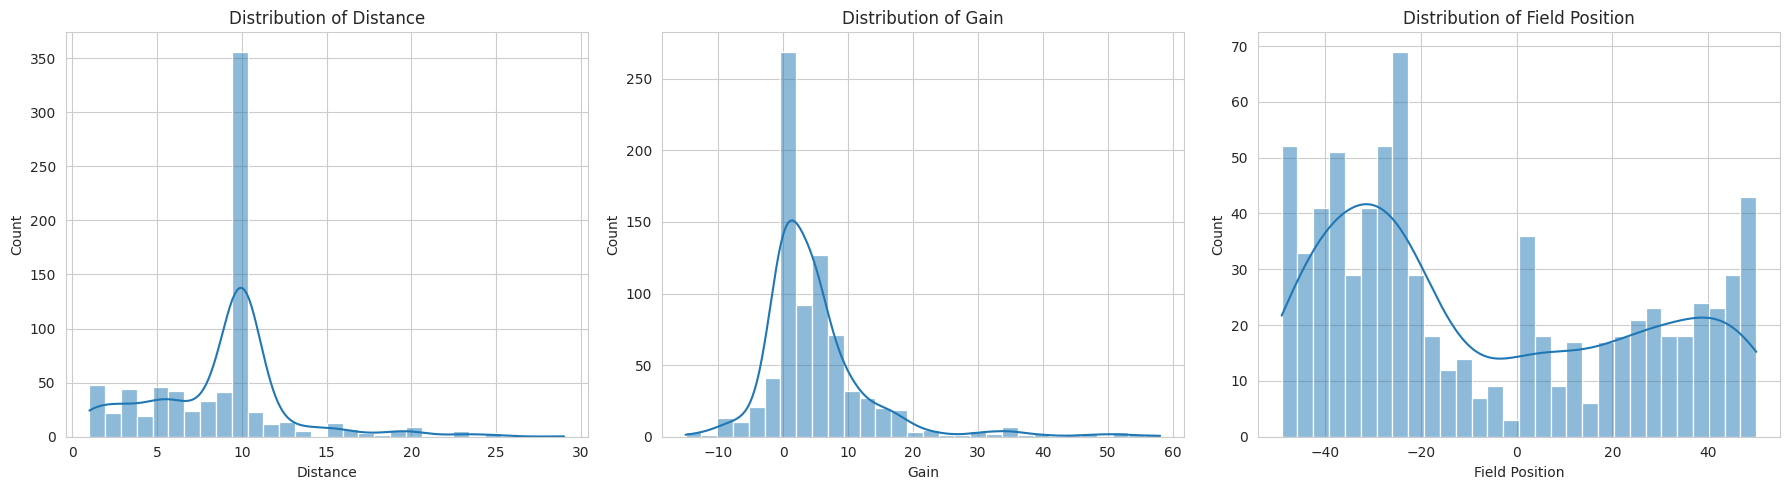

In [7]:
# Plotting histograms for key numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(football_data['Distance'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Distance')
sns.histplot(football_data['Gain'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Gain')
sns.histplot(football_data['Field Position'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Field Position')
plt.tight_layout()

<ipython-input-8-6eb0bda3f535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = football_data.corr()


Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

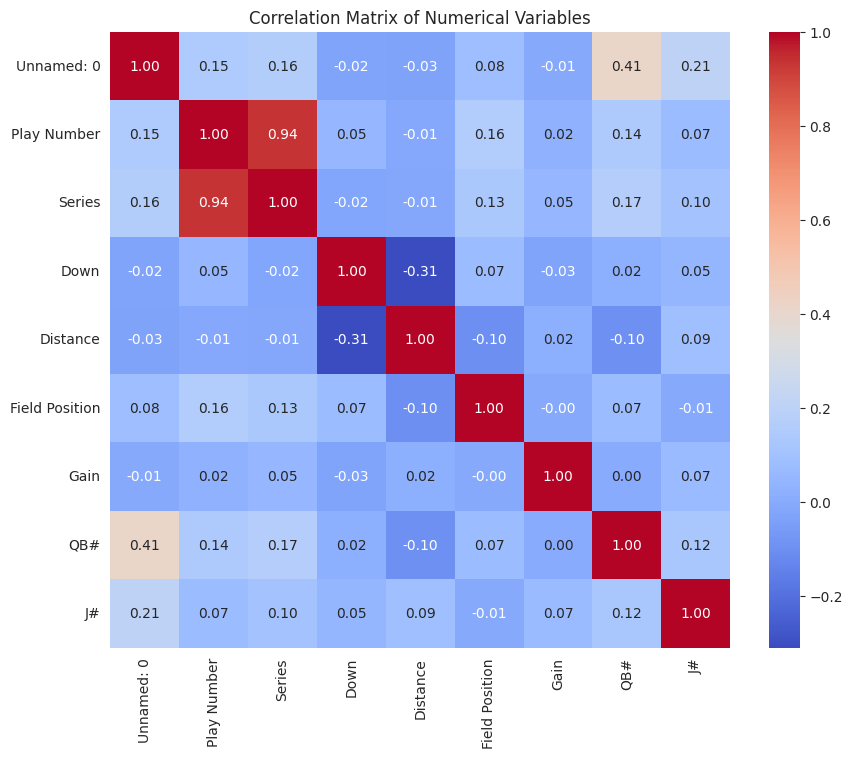

In [8]:
# Correlation Analysis
correlation_matrix = football_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')

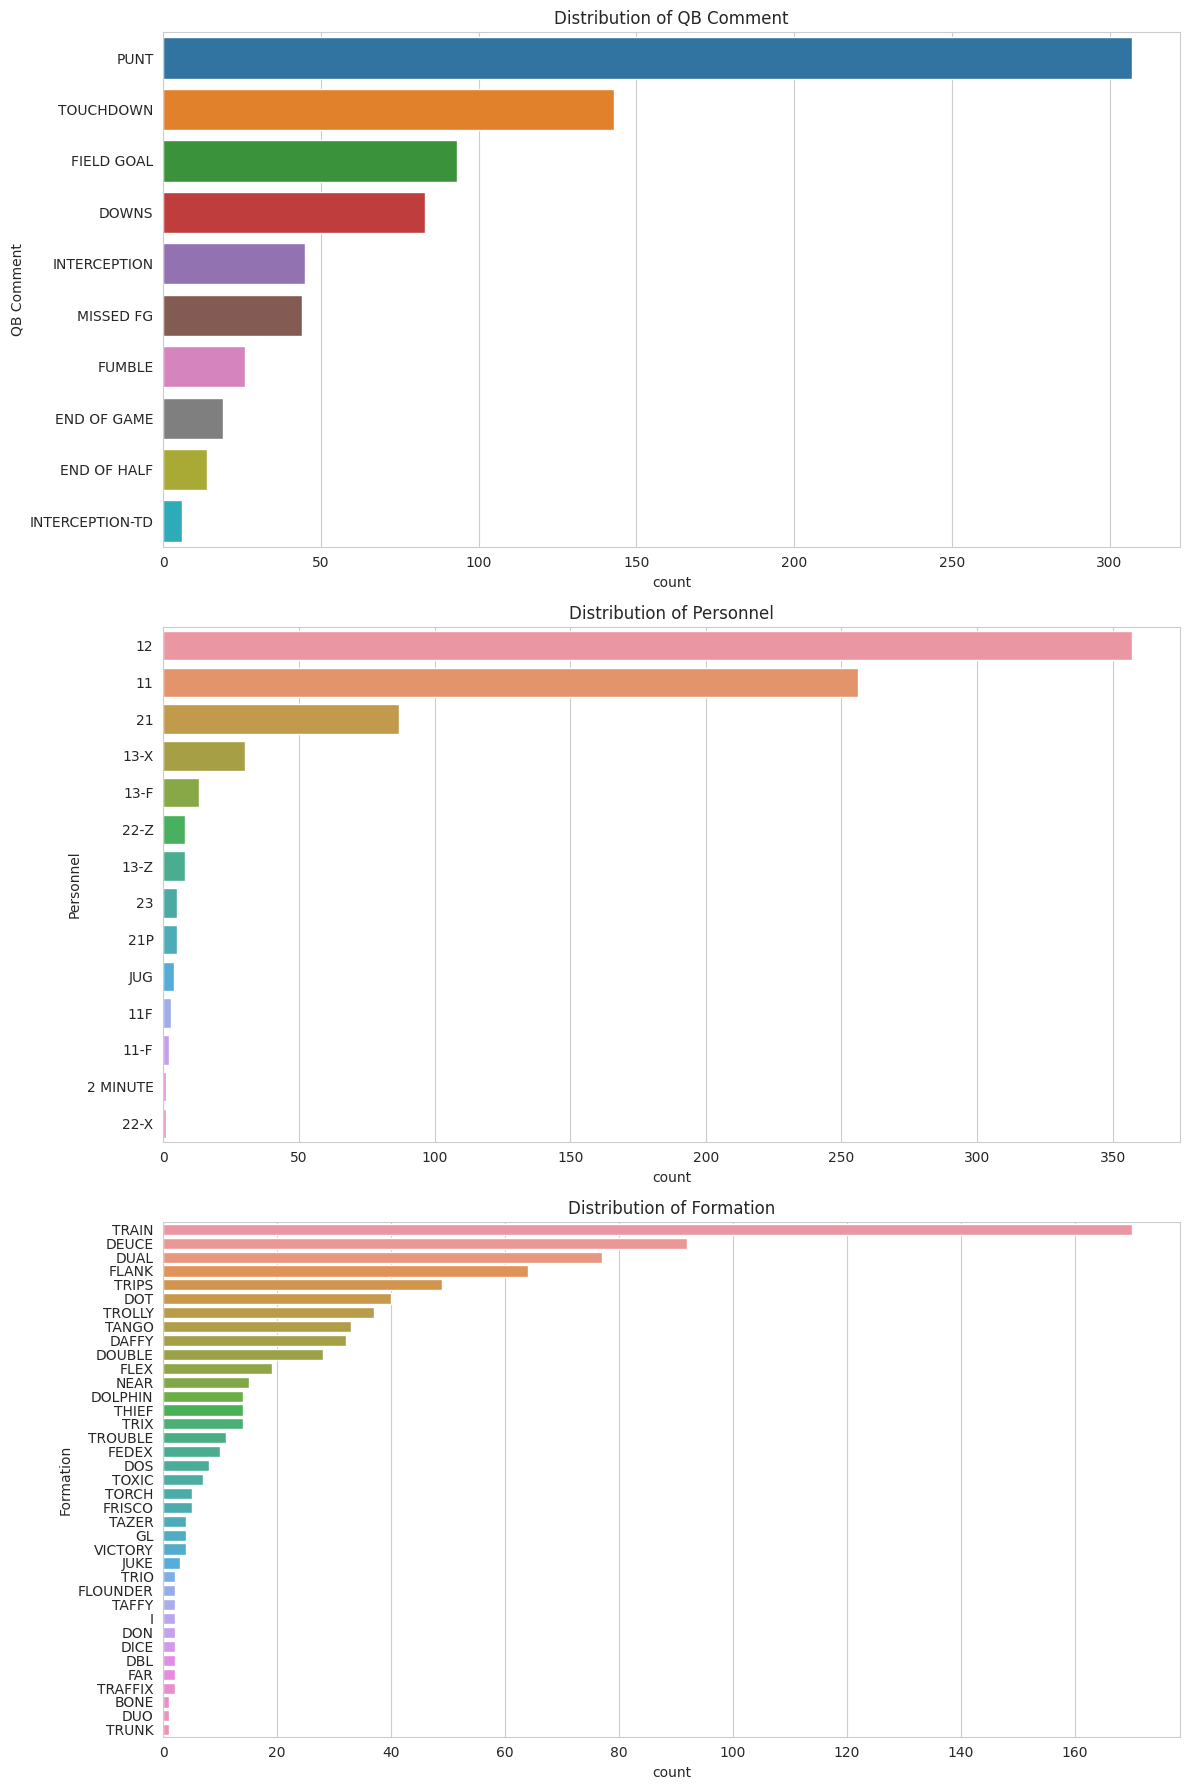

In [9]:
# Count plots for categorical variables
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.countplot(y='QB Comment', data=football_data, ax=axes[0], order=football_data['QB Comment'].value_counts().index)
axes[0].set_title('Distribution of QB Comment')
sns.countplot(y='Personnel', data=football_data, ax=axes[1], order=football_data['Personnel'].value_counts().index)
axes[1].set_title('Distribution of Personnel')
sns.countplot(y='Formation', data=football_data, ax=axes[2], order=football_data['Formation'].value_counts().index)
axes[2].set_title('Distribution of Formation')
plt.tight_layout()
plt.show()

# **Performance Analysis**

In [10]:
# Function to calculate offensive effectiveness metrics
def calculate_offensive_effectiveness(data):
    avg_gain = data['Gain'].mean()
    pass_completion_rate = (data['Pass Result'] == 'C').mean()
    run_pass_ratio = data['R/P'].value_counts(normalize=True)
    return avg_gain, pass_completion_rate, run_pass_ratio

In [11]:
# Function to evaluate quarterback performance
def quarterback_performance(data):
    qb_performance = data.groupby('QB#')['QB Comment'].value_counts(normalize=True)
    return qb_performance

In [12]:
# Function to analyze impact of formation and personnel on play outcomes
def formation_personnel_analysis(data):
    formation_effect = data.groupby('Formation')['Gain'].mean()
    personnel_effect = data.groupby('Personnel')['Gain'].mean()
    return formation_effect, personnel_effect

In [13]:
# Calculate offensive effectiveness
offensive_effectiveness = calculate_offensive_effectiveness(football_data)

In [14]:
# Evaluate quarterback performance
qb_performance = quarterback_performance(football_data)

In [15]:
# Analyze the impact of formation and personnel
formation_impact, personnel_impact = formation_personnel_analysis(football_data)

In [16]:
offensive_effectiveness

(4.9002770083102485,
 0.7628205128205128,
 R    0.502564
 P    0.464103
 X    0.032051
 p    0.001282
 Name: R/P, dtype: float64)

In [17]:
qb_performance.head()

QB#  QB Comment
4.0  PUNT          0.411602
     FIELD GOAL    0.132597
     TOUCHDOWN     0.124309
     DOWNS         0.107735
     MISSED FG     0.102210
Name: QB Comment, dtype: float64

In [18]:
formation_impact.head()

Formation
BONE     9.000000
DAFFY    5.018785
DBL      2.500000
DEUCE    4.776105
DICE     1.500000
Name: Gain, dtype: float64

In [19]:
personnel_impact.head()

Personnel
11      5.129317
11-F    2.950139
11F     7.666667
12      4.873414
13-F    2.615385
Name: Gain, dtype: float64

# **Strategic Insights**

In [20]:
# Analyzing decision-making based on Down, Distance, and Field Position
def decision_making_analysis(data):
    decision_making = data.groupby(['Down', 'Distance'])['Play'].value_counts(normalize=True)
    return decision_making

In [21]:
# Examining strategic choices in play-calling based on Formation, Personnel, and Run/Pass Concepts
def play_calling_strategy(data):
    strategy = data.groupby(['Formation', 'Personnel', 'R/P'])['Play'].value_counts(normalize=True)
    return strategy

In [22]:
# Analyzing impact of tempo and motion on the game
def tempo_motion_analysis(data):
    tempo_impact = data['Motion'].value_counts(normalize=True)
    return tempo_impact

In [23]:
# Decision-making analysis
decision_making = decision_making_analysis(football_data)

In [24]:
# Play-calling strategy analysis
play_calling_strategies = play_calling_strategy(football_data)

In [25]:
# Tempo and motion analysis
tempo_motion_impact = tempo_motion_analysis(football_data)

In [26]:
decision_making.head()

Down  Distance  Play        
0.0   10.0      LION OLY        0.142857
                BEAR OMAR       0.030075
                SPIDER SLICE    0.030075
                VICTORY         0.030075
                S. PITT         0.022556
Name: Play, dtype: float64

In [27]:
play_calling_strategies.head()

Formation  Personnel  R/P  Play                  
BONE       21         R    BEETLE H-TRAIL            1.000000
DAFFY      11         P    LOAD Y-DELAY STAR         0.117647
                           F-JILL COAT X-DANGLE      0.058824
                           JILL MARS ANKLE           0.058824
                           LIZZY Z-5-1 SUN SWITCH    0.058824
Name: Play, dtype: float64

In [28]:
tempo_motion_impact.head()

AC-Y       0.553846
YAHOO      0.041026
IN-Y       0.039744
IN-H       0.033333
PLANE-Z    0.030769
Name: Motion, dtype: float64